# readin csv file 

In [82]:
### Don't mind about this 
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')
###


%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


table = pd.read_csv('Loan_Default.csv')
table.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


# dropping insignificant features 


In [83]:
#drop year since all are 2019
table.drop('year', inplace=True, axis=1)
table.drop('ID', inplace=True, axis=1)
table.drop('dtir1', inplace=True, axis=1)
table

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,436500,3.125,...,7860.0,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0
148666,cf,Male,nopre,type1,p1,l1,nopc,nob/c,586500,5.190,...,7140.0,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0
148667,cf,Male,nopre,type1,p4,l1,nopc,nob/c,446500,3.125,...,6900.0,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0
148668,cf,Female,nopre,type1,p4,l1,nopc,nob/c,196500,3.500,...,7140.0,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0


# Splitting Training and Testing Data


In [92]:
from sklearn.model_selection import train_test_split
X = table.loc[:,table.columns !="Status"] #all colomns except Status
y = table['Status'] #Status column

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30) #data is randomized during spliiting
X_train.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV
count,1.189360e+05,89870.000000,89712.000000,87265.000000,118901.000000,1.068830e+05,111630.000000,118936.000000,106883.000000
mean,3.310158e+05,4.045944,0.442919,3237.810042,335.122245,4.977965e+05,6952.660038,699.705329,72.776769
std,1.832076e+05,0.561400,0.512026,3255.704349,58.424411,3.592986e+05,6322.948146,115.854783,43.661283
min,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478
25%,1.965000e+05,3.625000,0.077600,591.650000,360.000000,2.680000e+05,3720.000000,599.000000,60.416667
50%,2.965000e+05,3.990000,0.392000,2612.500000,360.000000,4.180000e+05,5760.000000,699.000000,75.122549
75%,4.365000e+05,4.375000,0.777325,4838.750000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211
max,3.346500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,377220.000000,900.000000,7831.250000


# Normalization of the Data


First step is data visualization of the features to be normalized


<AxesSubplot:xlabel='Status', ylabel='loan_amount'>

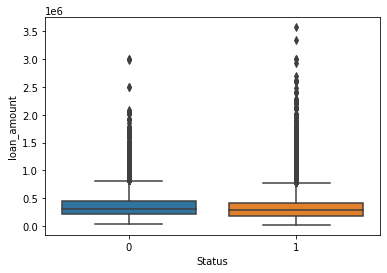

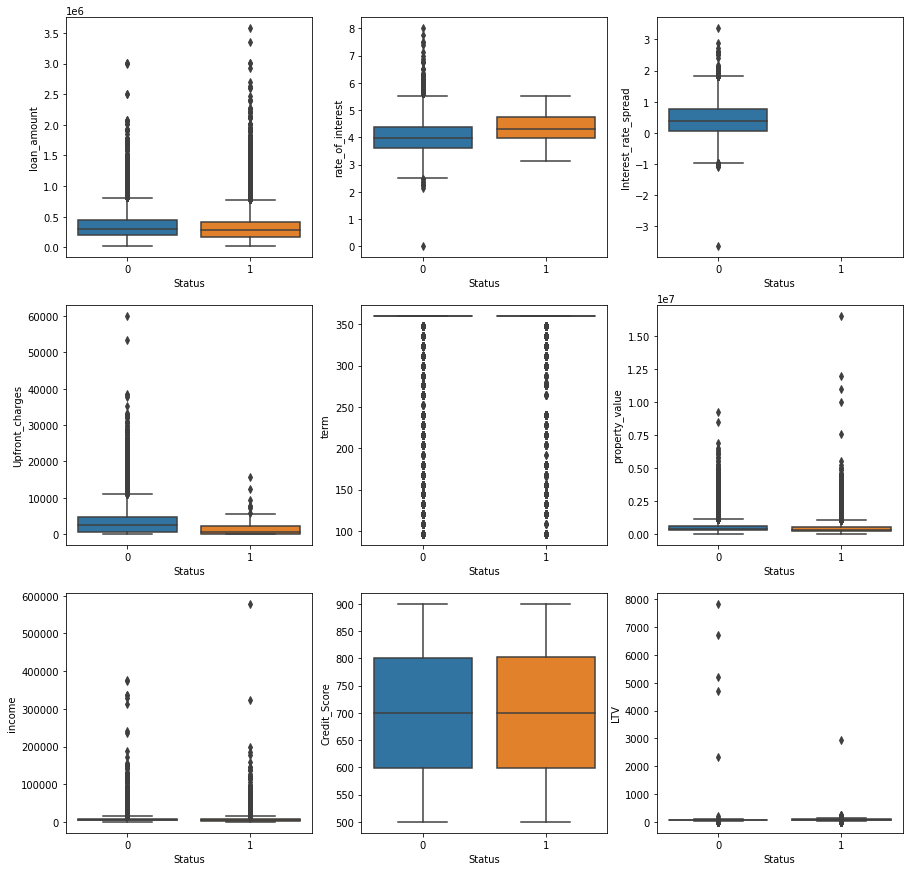

In [103]:

#sns.boxplot(x='Status',y='loan_amount',data=X_train)
#sns.boxplot(x='Status',y='rate_of_interest',data=table)

fig, axes = plt.subplots(3, 3)

fig.set_figheight(15)
fig.set_figwidth(15)

ax = sns.boxplot(x="Status", y="loan_amount", data=table, orient='v',ax=axes[0, 0])
ax = sns.boxplot(x="Status", y="rate_of_interest", data=table, orient='v',ax=axes[0, 1])
ax = sns.boxplot(x="Status", y="Interest_rate_spread", data=table, orient='v', ax=axes[0, 2])
ax = sns.boxplot(x="Status", y="Upfront_charges", data=table, orient='v',ax=axes[1, 0])
ax = sns.boxplot(x="Status", y="term", data=table, orient='v',ax=axes[1, 1])
ax = sns.boxplot(x="Status", y="property_value", data=table, orient='v',ax=axes[1, 2])
ax = sns.boxplot(x="Status", y="income", data=table, orient='v', ax=axes[2, 0])
ax = sns.boxplot(x="Status", y="Credit_Score", data=table, orient='v',ax=axes[2, 1])
ax = sns.boxplot(x="Status", y="LTV", data=table, orient='v',ax=axes[2, 2])



# Encoding function

In [86]:
encodes=[]

def label_encoding(label):
    uniques = table[label].unique()
    #the encoding is the index
    for i in range(len(uniques)):
        table.loc[table[label] == uniques[i],label]=i
    encodes.append(uniques)



# plotting heatmap

<AxesSubplot:>

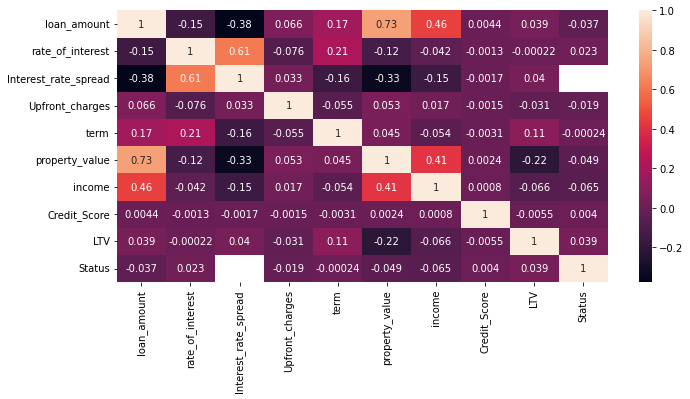

In [87]:
fig = plt.figure(figsize= (11,5))
correlation = table.corr()
sns.heatmap(correlation, annot = True)

# label encoding 

In [88]:
for i in range(len(table.iloc[3])):
   if(type(table.iloc[3][i])==str):
       label_encoding(table.columns[i])

table

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status
0,0,0,0,0,0,0,0,0,116500,NaN,...,1740.0,0,758,0,0,0,98.728814,0,0,1
1,0,1,0,1,0,0,0,1,206500,NaN,...,4980.0,1,552,1,1,0,NaN,1,0,1
2,0,1,1,0,0,0,0,0,406500,4.560,...,9480.0,0,834,0,2,0,80.019685,0,0,0
3,0,1,0,0,1,0,0,0,456500,4.250,...,11880.0,0,587,0,3,1,69.376900,1,0,0
4,0,2,1,0,0,0,0,0,696500,4.000,...,10440.0,2,602,1,0,1,91.886544,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,0,0,0,0,2,0,0,0,436500,3.125,...,7860.0,3,659,1,1,0,71.792763,0,0,0
148666,0,1,0,0,0,0,0,0,586500,5.190,...,7140.0,3,569,0,0,1,74.428934,0,0,0
148667,0,1,0,0,1,0,0,0,446500,3.125,...,6900.0,3,702,1,3,1,61.332418,1,0,0
148668,0,3,0,0,1,0,0,0,196500,3.500,...,7140.0,0,737,1,1,0,70.683453,1,0,0


# Data Visualization


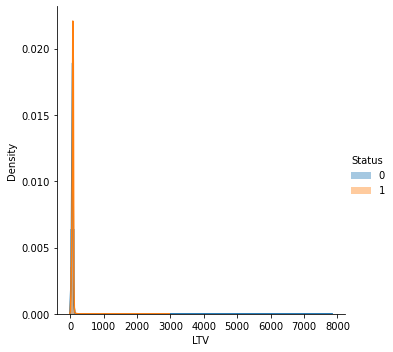

In [89]:
from matplotlib import pyplot
#sns.boxplot(x='Status',y='loan_amount',data=table)

#sns.distplot(table['Gender'])

#plt.scatter(table['rate_of_interest'],table['loan_amount'])

sns.FacetGrid(table,hue='Status',size=5).map(sns.distplot,'LTV').add_legend() #histogram and PDF


# analysing the null value distribution in the dataset

In [90]:
#sns.countplot(x="Region", hue="Status",  data=table )
missing_values=table.isnull().sum().sort_values(ascending=False).head(20)
missing_percentge= (missing_values/len(table))*100
missing_percentge


Upfront_charges              26.664425
Interest_rate_spread         24.644515
rate_of_interest             24.509989
LTV                          10.155378
property_value               10.155378
income                        6.154571
loan_limit                    2.249277
approv_in_adv                 0.610749
submission_of_application     0.134526
age                           0.134526
loan_purpose                  0.090133
Neg_ammortization             0.081388
term                          0.027578
Region                        0.000000
total_units                   0.000000
Security_Type                 0.000000
co-applicant_credit_type      0.000000
Credit_Score                  0.000000
credit_type                   0.000000
lump_sum_payment              0.000000
dtype: float64

# plotting relations with respect to Status label

<AxesSubplot:ylabel='Frequency'>

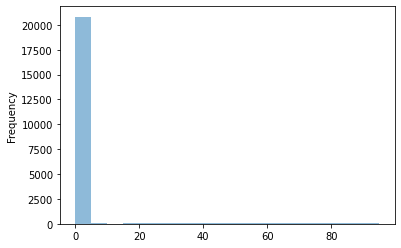

In [91]:
table["Upfront_charges"].plot.hist(bins=np.arange(0,100, 5), alpha=0.5)